In [1]:
from src.dataloading import get_full_dataset, get_stage1_loaders, get_model
from src.train import train_stage1
from src.test import test_stage1

c:\Users\CL-11\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_data = True

train = True
scratch = False
epochs = 30

test = True


In [3]:
img_size = 256

constraint_dataset, originals_dataset, fused_dataset = get_full_dataset(1, 3, True, 90) # define the patient numbers

train_loader, val_loader, test_loader = get_stage1_loaders(constraint_dataset, img_size)

device, model, criterion, optimizer = get_model()

print(model)

Pairs: 76
Train size: 53, Validation size: 11, Test size: 12
N2NUNet


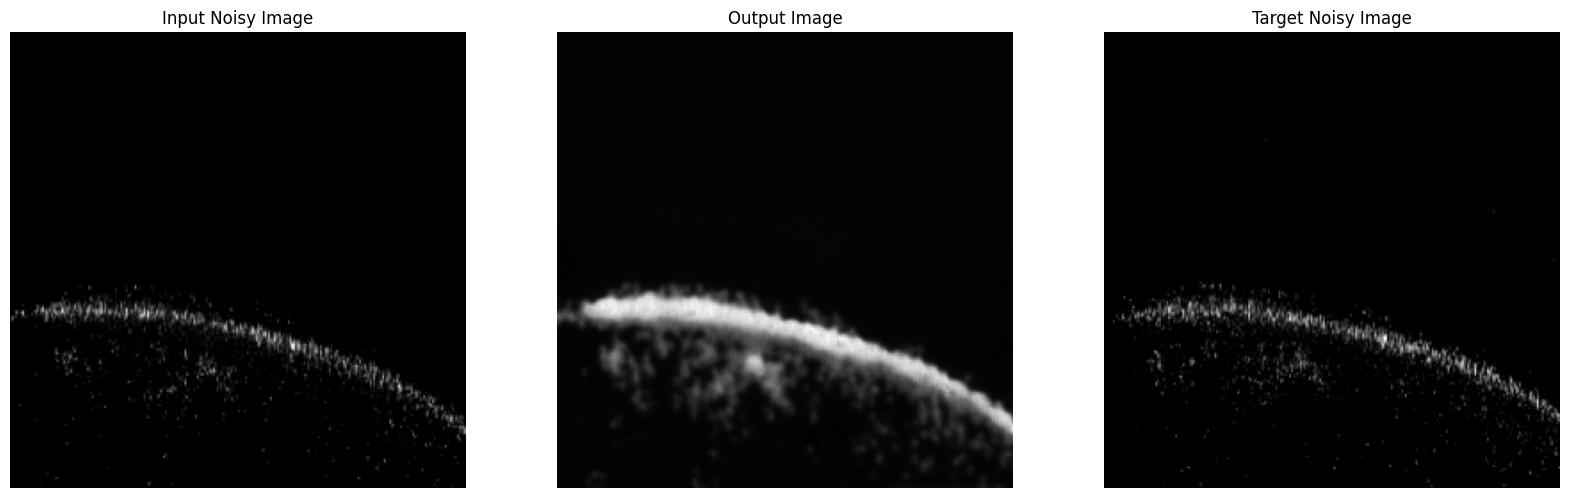

In [4]:
if train:
    #model, history = train_stage1(img_size, model, train_loader, val_loader, criterion, optimizer, epochs, device, scratch)

    from src.train import train_stage1_patched

    model, history = train_stage1_patched(
        img_size=256,
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        patch_size=128,    # Adjust based on your GPU memory
        stride=96,         # 32px overlap
        epochs=10,
        device=device
    )

    

if test:
    test_results = test_stage1(img_size, model, test_loader, criterion, device, path=f"C:\\temp\\checkpoints\\stage1_{img_size}_best_{str(model)}_model.pth")

In [5]:
if save_data:
    from src.utils import save_stage1_data

    save_stage1_data(originals_dataset, constraint_dataset, model, device)

In [ ]:
if save_data:
    from src.utils import save_fused

    save_fused(fused_dataset)

Saved: C:\temp\stage1\0\fused\0_1.png
Saved: C:\temp\stage1\0\fused\0_2.png
Saved: C:\temp\stage1\0\fused\0_3.png
Saved: C:\temp\stage1\0\fused\0_4.png
Saved: C:\temp\stage1\0\fused\0_5.png
Saved: C:\temp\stage1\0\fused\0_6.png
Saved: C:\temp\stage1\0\fused\0_7.png
Saved: C:\temp\stage1\0\fused\0_8.png
Saved: C:\temp\stage1\0\fused\0_9.png
Saved: C:\temp\stage1\0\fused\1_1.png
Saved: C:\temp\stage1\0\fused\1_2.png
Saved: C:\temp\stage1\0\fused\1_3.png
Saved: C:\temp\stage1\0\fused\1_4.png
Saved: C:\temp\stage1\0\fused\1_5.png
Saved: C:\temp\stage1\0\fused\1_6.png
Saved: C:\temp\stage1\0\fused\1_7.png
Saved: C:\temp\stage1\0\fused\1_8.png
Saved: C:\temp\stage1\0\fused\1_9.png
Saved: C:\temp\stage1\0\fused\2_1.png
Saved: C:\temp\stage1\0\fused\2_2.png
Saved: C:\temp\stage1\0\fused\2_3.png
Saved: C:\temp\stage1\0\fused\2_4.png
Saved: C:\temp\stage1\0\fused\2_5.png
Saved: C:\temp\stage1\0\fused\2_6.png
Saved: C:\temp\stage1\0\fused\2_7.png
Saved: C:\temp\stage1\0\fused\2_8.png
Saved: C:\te

: 